In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [177]:
data = pd.read_csv('seoul_population.csv', encoding='cp949')
data = data.drop(0)
data = data.reset_index()
data = data.drop(['index',  '2020년12월_계_총인구수', '2020년12월_계_연령구간인구수'], axis= 1)

In [178]:
columns = data.columns
dict = {}
for c in columns:
    list = c.split('_')
    dict[c] = list[-1]

data = data.rename(dict, axis='columns')

In [179]:
columns = data.columns
for c in columns[1:]:
    data[c] = data[c].apply(lambda x: x.replace(',','_'))
    data[c] = data[c].astype('int')
    
data

,행정구역,0세,1세,2세,3세,4세,5세,6세,7세,8세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
0,서울특별시 종로구 (1111000000),469,585,586,676,764,843,869,833,990,...,190,160,132,104,76,61,53,57,44,276
1,서울특별시 중구 (1114000000),612,624,623,682,740,729,682,720,743,...,194,138,115,67,50,44,46,36,27,205
2,서울특별시 용산구 (1117000000),1085,1221,1249,1288,1455,1473,1411,1382,1507,...,314,241,179,135,110,97,102,70,55,371
3,서울특별시 성동구 (1120000000),1873,1935,1967,2058,2228,2226,2099,2032,2068,...,221,198,141,91,74,53,47,48,30,251
4,서울특별시 광진구 (1121500000),1402,1612,1672,1753,1912,2163,2101,2194,2426,...,259,184,169,97,83,68,53,46,37,218
5,서울특별시 동대문구 (1123000000),1631,1860,1850,2008,2168,2306,2224,2145,2363,...,295,246,201,122,89,80,82,69,42,313
6,서울특별시 중랑구 (1126000000),1761,2012,2092,2191,2475,2559,2321,2483,2624,...,300,288,187,137,101,73,65,51,37,206
7,서울특별시 성북구 (1129000000),2013,2217,2380,2594,3016,3218,3173,3163,3503,...,397,330,273,182,122,91,87,61,54,384
8,서울특별시 강북구 (1130500000),1003,1149,1309,1503,1651,1694,1658,1807,1979,...,294,233,180,121,102,76,63,51,44,249
9,서울특별시 도봉구 (1132000000),1171,1450,1590,1756,1948,2049,2169,2016,2333,...,318,305,210,152,95,73,71,48,30,175


In [180]:
a = data[(data['행정구역'] != '서울특별시 광진구 (1121500000)')]
b = data[(data['행정구역'] == '서울특별시 광진구 (1121500000)')]
a = a.reset_index()
a = a.drop('index', axis=1)
titles = a['행정구역'].values
a = a.drop('행정구역', axis=1)
b = b.drop('행정구역', axis=1)
a = np.array(a)
b = np.array(b)
diff = (a-b)**2
sums = []
for list in diff:
    sum = list.sum()
    sums.append(sum)

max_diff_loc = titles[sums.index(max(sums))]
min_diff_loc = titles[sums.index(min(sums))]

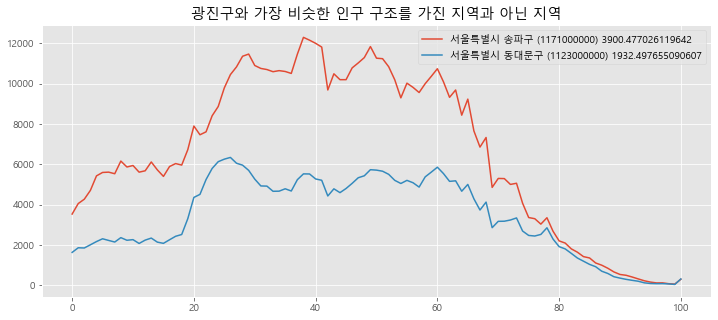

In [181]:
data1 = data[(data['행정구역'] == max_diff_loc)]
data2 = data[(data['행정구역'] == min_diff_loc)]
data1 = data1.drop('행정구역', axis=1)
data2 = data2.drop('행정구역', axis=1)
std1 = data1.std(axis=1).values[0]
std2 = data2.std(axis=1).values[0]


data1 = np.array(data1).reshape(-1,)
data2 = np.array(data2).reshape(-1,)
plt.style.use('ggplot')

fig = plt.figure(figsize = (12, 5))
chart = fig.add_subplot(1,1,1)
chart.plot(data1, label=max_diff_loc + ' ' + str(std1))
chart.plot(data2, label=min_diff_loc + ' ' + str(std2))
chart.set_title('광진구와 가장 비슷한 인구 구조를 가진 지역과 아닌 지역')
plt.legend(loc='best')
plt.show()